# Penguins example
### ¶We will use the penguin dataset to train a neural network which can classify which species a penguin belongs to, based on their physical characteristics.
### (inspired from https://carpentries-incubator.github.io/deep-learning-intro/02-keras/index.html and https://github.com/mcnakhaee/palmerpenguins)

In [1]:
pip install palmerpenguins

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import seaborn as sns 
from palmerpenguins import load_penguins
sns.set_style('whitegrid')

In [3]:
penguins = load_penguins()

In [4]:
type(penguins)

pandas.core.frame.DataFrame

In [5]:
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007


In [6]:
penguins.describe()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,year
count,342.000000,342.000000,342.000000,342.000000,344.000000
mean,43.921930,17.151170,200.915205,4201.754386,2008.029070
std,5.459584,1.974793,14.061714,801.954536,0.818356
min,32.100000,13.100000,172.000000,2700.000000,2007.000000
25%,39.225000,15.600000,190.000000,3550.000000,2007.000000
50%,44.450000,17.300000,197.000000,4050.000000,2008.000000
75%,48.500000,18.700000,213.000000,4750.000000,2009.000000
max,59.600000,21.500000,231.000000,6300.000000,2009.000000


In [7]:
penguins["species"].unique()

array(['Adelie', 'Gentoo', 'Chinstrap'], dtype=object)

In [8]:
penguins["species"].describe()

count        344
unique         3
top       Adelie
freq         152
Name: species, dtype: object

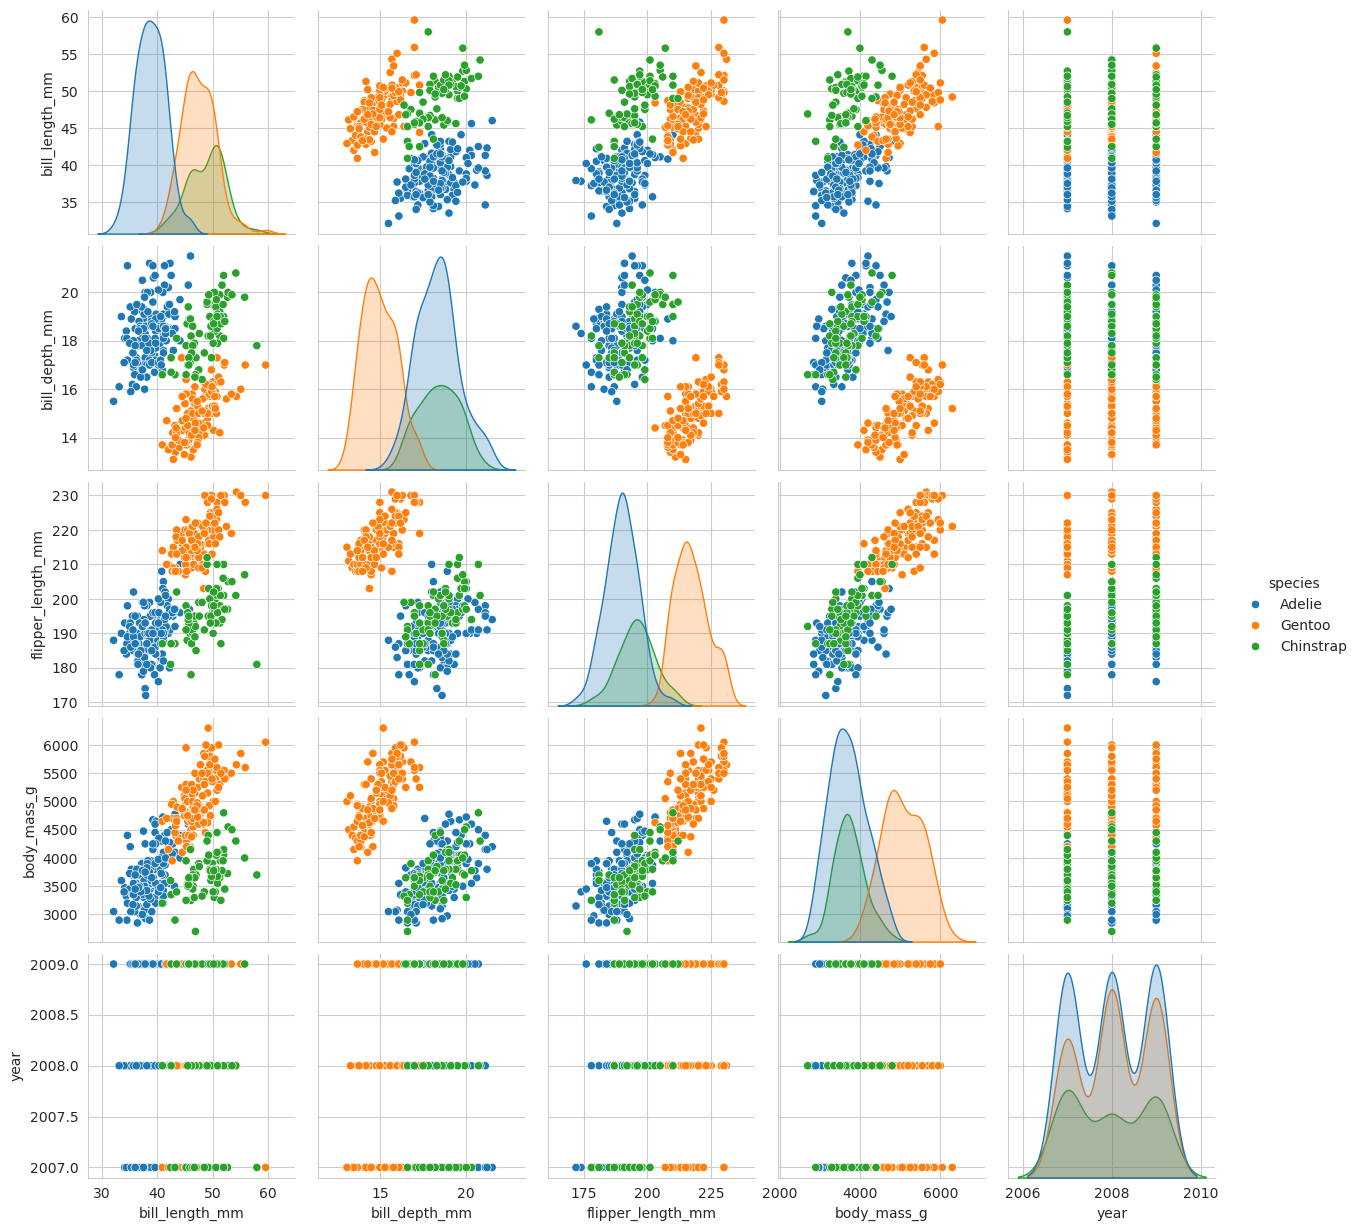

In [9]:
sns.pairplot(penguins, hue="species")

In [10]:
penguins['species'] = penguins['species'].astype('category')

In [11]:
# Drop two columns and the rows that have NaN values in them
penguins_filtered = penguins.drop(columns=['island', 'sex']).dropna()
penguins_filtered

,species,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,year
0,Adelie,39.1,18.7,181.0,3750.0,2007
1,Adelie,39.5,17.4,186.0,3800.0,2007
2,Adelie,40.3,18.0,195.0,3250.0,2007
4,Adelie,36.7,19.3,193.0,3450.0,2007
5,Adelie,39.3,20.6,190.0,3650.0,2007
...,...,...,...,...,...,...
339,Chinstrap,55.8,19.8,207.0,4000.0,2009
340,Chinstrap,43.5,18.1,202.0,3400.0,2009
341,Chinstrap,49.6,18.2,193.0,3775.0,2009
342,Chinstrap,50.8,19.0,210.0,4100.0,2009


In [12]:
# Extract columns corresponding to features
penguins_features = penguins_filtered.drop(columns=['species'])
penguins_features

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,year
0,39.1,18.7,181.0,3750.0,2007
1,39.5,17.4,186.0,3800.0,2007
2,40.3,18.0,195.0,3250.0,2007
4,36.7,19.3,193.0,3450.0,2007
5,39.3,20.6,190.0,3650.0,2007
...,...,...,...,...,...
339,55.8,19.8,207.0,4000.0,2009
340,43.5,18.1,202.0,3400.0,2009
341,49.6,18.2,193.0,3775.0,2009
342,50.8,19.0,210.0,4100.0,2009


In [13]:
import pandas as pd

target = pd.get_dummies(penguins_filtered['species'])
target.head() # print out the top 5 to see what it looks like.

,Adelie,Chinstrap,Gentoo
0,True,False,False
1,True,False,False
2,True,False,False
4,True,False,False
5,True,False,False


In [14]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(penguins_features, target,test_size=0.1, random_state=0, shuffle=True, stratify=target)

In [15]:
X_train

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,year
245,49.5,16.1,224.0,5650.0,2009
338,45.7,17.0,195.0,3650.0,2009
89,38.9,18.8,190.0,3600.0,2008
262,50.5,15.2,216.0,5000.0,2009
48,36.0,17.9,190.0,3450.0,2007
...,...,...,...,...,...
285,51.3,19.9,198.0,3700.0,2007
268,44.5,15.7,217.0,4875.0,2009
218,46.2,14.4,214.0,4650.0,2008
234,47.4,14.6,212.0,4725.0,2009


In [16]:
X_test

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,year
333,49.3,19.9,203.0,4050.0,2009
112,39.7,17.7,193.0,3200.0,2009
239,51.3,14.2,218.0,5300.0,2009
269,48.8,16.2,222.0,6000.0,2009
311,47.5,16.8,199.0,3900.0,2008
12,41.1,17.6,182.0,3200.0,2007
219,49.5,16.2,229.0,5800.0,2008
278,51.3,19.2,193.0,3650.0,2007
161,46.8,15.4,215.0,5150.0,2007
84,37.3,17.8,191.0,3350.0,2008


In [17]:
y_train

,Adelie,Chinstrap,Gentoo
245,False,False,True
338,False,True,False
89,True,False,False
262,False,False,True
48,True,False,False
...,...,...,...
285,False,True,False
268,False,False,True
218,False,False,True
234,False,False,True


In [18]:
y_test

,Adelie,Chinstrap,Gentoo
333,False,True,False
112,True,False,False
239,False,False,True
269,False,False,True
311,False,True,False
12,True,False,False
219,False,False,True
278,False,True,False
161,False,False,True
84,True,False,False


In [19]:
from tensorflow import keras

2024-01-09 07:27:03.676328: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [20]:
from numpy.random import seed
seed(1)
from tensorflow.random import set_seed
set_seed(2)

In [21]:
inputs = keras.Input(shape=X_train.shape[1])
inputs

<KerasTensor: shape=(None, 5) dtype=float32 (created by layer 'input_1')>

In [22]:
hidden_layer = keras.layers.Dense(10, activation="relu")(inputs)

2024-01-09 07:27:06.498989: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1639] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 20953 MB memory:  -> device: 0, name: NVIDIA A10, pci bus id: 0000:61:00.0, compute capability: 8.6


In [23]:
output_layer = keras.layers.Dense(3, activation="softmax")(hidden_layer)

In [24]:
model = keras.Model(inputs=inputs, outputs=output_layer)
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 5)]               0         
                                                                 
 dense (Dense)               (None, 10)                60        
                                                                 
 dense_1 (Dense)             (None, 3)                 33        
                                                                 
Total params: 93 (372.00 Byte)
Trainable params: 93 (372.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [25]:
import tensorflow as tf
model.compile(optimizer=tf.keras.optimizers.legacy.Adam(), loss=keras.losses.CategoricalCrossentropy())

In [26]:
history = model.fit(X_train, y_train, epochs=100)

Epoch 1/100
10/10 [==============================] - 0s 2ms/step - loss: 1015.4874
Epoch 2/100
10/10 [==============================] - 0s 2ms/step - loss: 884.8992
Epoch 3/100
10/10 [==============================] - 0s 2ms/step - loss: 761.2500
Epoch 4/100
10/10 [==============================] - 0s 2ms/step - loss: 643.1030
Epoch 5/100
10/10 [==============================] - 0s 2ms/step - loss: 535.1355
Epoch 6/100
10/10 [==============================] - 0s 2ms/step - loss: 457.2358
Epoch 7/100
10/10 [==============================] - 0s 2ms/step - loss: 378.4028
Epoch 8/100
 1/10 [==>...........................] - ETA: 0s - loss: 378.2369

2024-01-09 07:27:07.202523: I tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:606] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.


10/10 [==============================] - 0s 2ms/step - loss: 303.1219
Epoch 9/100
10/10 [==============================] - 0s 2ms/step - loss: 226.0870
Epoch 10/100
10/10 [==============================] - 0s 2ms/step - loss: 154.4714
Epoch 11/100
10/10 [==============================] - 0s 2ms/step - loss: 82.2054
Epoch 12/100
10/10 [==============================] - 0s 2ms/step - loss: 26.8942
Epoch 13/100
10/10 [==============================] - 0s 2ms/step - loss: 29.9371
Epoch 14/100
10/10 [==============================] - 0s 2ms/step - loss: 21.5699
Epoch 15/100
10/10 [==============================] - 0s 2ms/step - loss: 20.9316
Epoch 16/100
10/10 [==============================] - 0s 2ms/step - loss: 19.9883
Epoch 17/100
10/10 [==============================] - 0s 2ms/step - loss: 18.9656
Epoch 18/100
10/10 [==============================] - 0s 2ms/step - loss: 18.5297
Epoch 19/100
10/10 [==============================] - 0s 2ms/step - loss: 17.7819
Epoch 20/100
10/10 [=======

<Axes: >

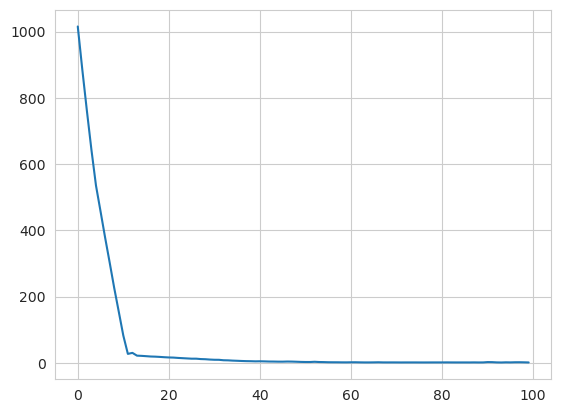

In [27]:
sns.lineplot(x=history.epoch, y=history.history['loss'])

In [28]:
y_pred = model.predict(X_test)
prediction = pd.DataFrame(y_pred, columns=target.columns)
prediction

2/2 [==============================] - 0s 7ms/step


,Adelie,Chinstrap,Gentoo
0,7.648391e-01,1.715673e-01,6.359363e-02
1,5.454711e-01,4.545289e-01,2.100461e-08
2,1.833452e-09,6.493035e-10,1.000000e+00
3,7.966254e-15,1.784904e-15,1.000000e+00
4,8.872245e-01,1.109848e-01,1.790675e-03
5,9.873828e-01,1.261715e-02,4.766879e-10
6,1.018278e-14,5.001138e-14,1.000000e+00
7,9.829051e-01,1.709081e-02,3.938773e-06
8,1.619196e-08,9.007781e-09,1.000000e+00
9,7.116187e-01,2.883812e-01,1.857964e-07


In [29]:
predicted_species = prediction.idxmax(axis="columns")
predicted_species

0     Adelie
1     Adelie
2     Gentoo
3     Gentoo
4     Adelie
5     Adelie
6     Gentoo
7     Adelie
8     Gentoo
9     Adelie
10    Gentoo
11    Adelie
12    Gentoo
13    Adelie
14    Adelie
15    Gentoo
16    Adelie
17    Adelie
18    Gentoo
19    Gentoo
20    Gentoo
21    Adelie
22    Adelie
23    Adelie
24    Adelie
25    Gentoo
26    Gentoo
27    Adelie
28    Adelie
29    Adelie
30    Gentoo
31    Adelie
32    Adelie
33    Adelie
34    Gentoo
dtype: category
Categories (3, object): ['Adelie', 'Chinstrap', 'Gentoo']

In [30]:
from sklearn.metrics import confusion_matrix

true_species = y_test.idxmax(axis="columns")

matrix = confusion_matrix(true_species, predicted_species)
print(matrix)

[[14  0  1]
 [ 7  0  0]
 [ 0  0 13]]


In [31]:
# Convert to a pandas dataframe
confusion_df = pd.DataFrame(matrix, index=y_test.columns.values, columns=y_test.columns.values)

# Set the names of the x and y axis, this helps with the readability of the heatmap.
confusion_df.index.name = 'True Label'
confusion_df.columns.name = 'Predicted Label'

<Axes: xlabel='Predicted Label', ylabel='True Label'>

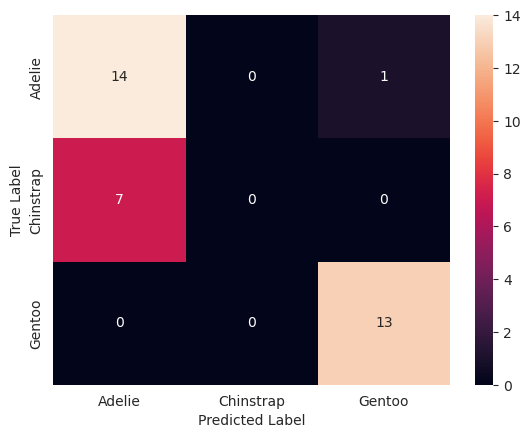

In [32]:
sns.heatmap(confusion_df, annot=True)

In [33]:
model.save('my_first_model')

INFO:tensorflow:Assets written to: my_first_model/assets


INFO:tensorflow:Assets written to: my_first_model/assets


In [34]:
pretrained_model = keras.models.load_model('my_first_model')

In [35]:
# use the pretrained model here
y_pretrained_pred = pretrained_model.predict(X_test)
pretrained_prediction = pd.DataFrame(y_pretrained_pred, columns=target.columns.values)

# idxmax will select the column for each row with the highest value
pretrained_predicted_species = pretrained_prediction.idxmax(axis="columns")
print(pretrained_predicted_species)

2/2 [==============================] - 0s 2ms/step
0     Adelie
1     Adelie
2     Gentoo
3     Gentoo
4     Adelie
5     Adelie
6     Gentoo
7     Adelie
8     Gentoo
9     Adelie
10    Gentoo
11    Adelie
12    Gentoo
13    Adelie
14    Adelie
15    Gentoo
16    Adelie
17    Adelie
18    Gentoo
19    Gentoo
20    Gentoo
21    Adelie
22    Adelie
23    Adelie
24    Adelie
25    Gentoo
26    Gentoo
27    Adelie
28    Adelie
29    Adelie
30    Gentoo
31    Adelie
32    Adelie
33    Adelie
34    Gentoo
dtype: category
Categories (3, object): ['Adelie', 'Chinstrap', 'Gentoo']
